In [407]:
from sklearn.model_selection import GridSearchCV 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler


In [408]:
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVC 
from sklearn.ensemble import GradientBoostingRegressor

## Importation des donées

In [427]:
df_train=pd.read_csv("train.csv")

In [428]:
df_test=pd.read_csv("test.csv")

In [429]:
df_train['sex'].replace(['male','female'],[0,1],inplace=True)
df_train['smoker'].replace(['yes','no'],[0,1],inplace=True)
df_train['region'].replace(['northeast','northwest','southeast','southwest'],[0,1,2,4],inplace=True)

In [430]:
df_test['sex'].replace(['male','female'],[0,1],inplace=True)
df_test['smoker'].replace(['yes','no'],[0,1],inplace=True)
df_test['region'].replace(['northeast','northwest','southeast','southwest'],[0,1,2,4],inplace=True)

## Affichage des données

In [431]:
df_train

,age,sex,bmi,children,smoker,region,charges
0,60,1,27.550,0,1,0,13217.09450
1,46,1,28.050,1,1,2,8233.09750
2,50,1,23.540,2,1,2,10107.22060
3,52,0,27.360,0,0,1,24393.62240
4,54,0,32.775,0,1,0,10435.06525
...,...,...,...,...,...,...,...
931,57,0,42.130,1,0,2,48675.51770
932,57,0,40.370,0,1,2,10982.50130
933,34,1,19.000,3,1,0,6753.03800
934,40,0,25.080,0,1,2,5415.66120


In [424]:
df_train['age']=StandardScaler().fit_transform(df_train)

In [425]:
df_train['bmi']=StandardScaler().fit_transform(df_train)

In [365]:
?MinMaxScaler.fit_transform

In [398]:
df_test=df_test.set_index('trustii_id')

In [399]:
df_test=StandardScaler().fit_transform(df_test)

In [426]:
df_train

,age,sex,bmi,children,smoker,region,charges
0,1.482843,1,1.482843,0,1,0,13217.09450
1,0.482319,1,0.482319,1,1,2,8233.09750
2,0.768183,1,0.768183,2,1,2,10107.22060
3,0.911115,0,0.911115,0,0,1,24393.62240
4,1.054047,0,1.054047,0,1,0,10435.06525
...,...,...,...,...,...,...,...
931,1.268445,0,1.268445,1,0,2,48675.51770
932,1.268445,0,1.268445,0,1,2,10982.50130
933,-0.375273,1,-0.375273,3,1,0,6753.03800
934,0.053523,0,0.053523,0,1,2,5415.66120


In [401]:
df_test=pd.DataFrame(df_test)

In [402]:
df_train=pd.DataFrame(df_train)

In [404]:
df_test

,0,1,2,3,4,5
0,0.839807,1.004988,0.792264,0.726662,-1.888963,-1.182309
1,0.910405,-0.995037,1.109381,0.726662,0.529391,-0.511945
2,0.486814,1.004988,-0.479715,-0.100868,0.529391,0.158419
3,0.628011,-0.995037,1.201617,0.726662,0.529391,0.158419
4,-0.289770,1.004988,-1.227266,0.726662,0.529391,-1.182309
...,...,...,...,...,...,...
397,-0.854558,-0.995037,0.119380,-0.100868,-1.888963,0.158419
398,0.910405,1.004988,0.074580,-0.928398,0.529391,-1.182309
399,0.910405,-0.995037,0.408387,1.554192,0.529391,-0.511945
400,-0.360369,1.004988,0.258174,-0.100868,-1.888963,-1.182309


## Encodage des données textes

In [286]:
df_train['sex'].replace(['male','female'],[0,1],inplace=True)
df_train['smoker'].replace(['yes','no'],[0,1],inplace=True)
df_train['region'].replace(['northeast','northwest','southeast','southwest'],[0,1,2,4],inplace=True)

In [287]:
df_test['sex'].replace(['male','female'],[0,1],inplace=True)
df_test['smoker'].replace(['yes','no'],[0,1],inplace=True)
df_test['region'].replace(['northeast','northwest','southeast','southwest'],[0,1,2,4],inplace=True)

In [288]:
df_train

,age,sex,bmi,children,smoker,region,charges
0,60,1,27.550,0,1,0,13217.09450
1,46,1,28.050,1,1,2,8233.09750
2,50,1,23.540,2,1,2,10107.22060
3,52,0,27.360,0,0,1,24393.62240
4,54,0,32.775,0,1,0,10435.06525
...,...,...,...,...,...,...,...
931,57,0,42.130,1,0,2,48675.51770
932,57,0,40.370,0,1,2,10982.50130
933,34,1,19.000,3,1,0,6753.03800
934,40,0,25.080,0,1,2,5415.66120


In [289]:
df_test=df_test.set_index('trustii_id')

In [433]:
df_test

,age,sex,bmi,children,smoker,region,trustii_id
0,51,1,34.960,2,0,0,1
1,52,0,36.765,2,1,1,2
2,46,1,27.720,1,1,2,3
3,48,0,37.290,2,1,2,4
4,35,1,23.465,2,1,0,5
...,...,...,...,...,...,...,...
397,27,0,31.130,1,0,2,398
398,52,1,30.875,0,1,0,399
399,52,0,32.775,3,1,1,400
400,34,1,31.920,1,0,0,401


## Visualisation des correlations

In [441]:
corr=df_train[:,:].corr()

TypeError: '(slice(None, None, None), slice(None, None, None))' is an invalid key

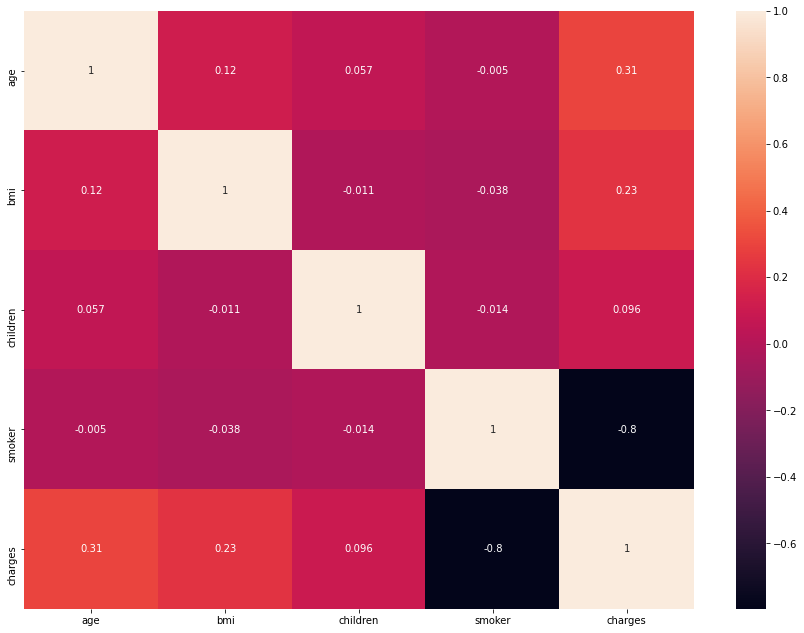

In [442]:
plt.figure(figsize=(15,11))

sns.heatmap(corr, 
xticklabels=corr.columns, 
yticklabels=corr . columns, annot=True)
plt.show()

### Separation des données en des variables de predictions et variable a predire

In [450]:
X_train=df_train[:,0:-1]
Y_train=df_train['charges'].values

TypeError: '(slice(None, None, None), slice(0, -1, None))' is an invalid key

In [291]:
X_train

,age,sex,bmi,children,smoker,region
0,60,1,27.550,0,1,0
1,46,1,28.050,1,1,2
2,50,1,23.540,2,1,2
3,52,0,27.360,0,0,1
4,54,0,32.775,0,1,0
...,...,...,...,...,...,...
931,57,0,42.130,1,0,2
932,57,0,40.370,0,1,2
933,34,1,19.000,3,1,0
934,40,0,25.080,0,1,2


### On partage des données en train et test set dans un premier temps

In [292]:
percentage_donnees_test = 0.20
X, X_VAL, Y, Y_VAL=train_test_split(X_train,Y_train, test_size=percentage_donnees_test)

In [293]:
modele=[DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),LinearRegression(),Ridge()]

In [294]:
def model_train(liste):
    dt={}
    for model in liste:
        M=model
        M.fit(X,Y)
        pred=M.predict(X_VAL)
        dt[M]=r2_score(pred,Y_VAL)
        
    return dt

In [295]:
model_train(modele)

{DecisionTreeRegressor(): 0.626514485090981,
 RandomForestRegressor(): 0.8125861577338673,
 GradientBoostingRegressor(): 0.8576436894015442,
 LinearRegression(): 0.6787694035105978,
 Ridge(): 0.6730880005535751}

In [137]:
?DecisionTreeRegressor

In [177]:
?RandomForestRegressor

In [246]:
?GradientBoostingRegressor

In [271]:
random_forest = [{'n_estimators': range(100,200)},{'min_samples_split':range(2,100)},{'max_leaf_nodes':range(2,100)},{'min_samples_leaf':range(1,100)},{'criterion':["mse", "mae"]},{'max_features': ["auto", "sqrt", "log2"]}]

In [161]:
random_tree= [{'criterion': ["mse", "friedman_mse", "mae", "poisson"]},{'splitter':["best", "random"]},
              {'max_depth':range(1,100)},{'min_samples_leaf':range(1,100)},{'max_features':["auto", "sqrt", "log2"]}]

In [296]:
random_grandient=[{'loss':['ls', 'lad', 'huber', 'quantile']},{'criterion':['friedman_mse', 'mse', 'mae']},{'n_estimators': range(100,200)},
              {'max_depth':range(1,30)},{'min_samples_leaf':range(1,30)},{'max_features':["auto", "sqrt", "log2"]}]

In [272]:
grid=GridSearchCV(RandomForestRegressor(),random_forest,cv=2,verbose=True, n_jobs=-1 )

In [162]:
grid=GridSearchCV(DecisionTreeRegressor(),random_tree,cv=2,verbose=True, n_jobs=-1 )

In [297]:
grid=GridSearchCV(GradientBoostingRegressor(),random_grandient,cv=2,verbose=True, n_jobs=-1 )

In [298]:
grid.fit(X_train,Y_train)

Fitting 2 folds for each of 168 candidates, totalling 336 fits


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid=[{'loss': ['ls', 'lad', 'huber', 'quantile']},
                         {'criterion': ['friedman_mse', 'mse', 'mae']},
                         {'n_estimators': range(100, 200)},
                         {'max_depth': range(1, 30)},
                         {'min_samples_leaf': range(1, 30)},
                         {'max_features': ['auto', 'sqrt', 'log2']}],
             verbose=True)

In [299]:
grid.best_score_

0.8501317262508994

In [300]:
model=grid.best_estimator_

In [302]:
predic=model.predict(df_test)

In [301]:
df_test=df_test.drop('charges',axis=1)

KeyError: "['charges'] not found in axis"

In [303]:
df_test['charges']=predic

In [304]:
df_test

,age,sex,bmi,children,smoker,region,charges
trustii_id,,,,,,,
1,51,1,34.960,2,0,0,46555.269135
2,52,0,36.765,2,1,1,14292.898597
3,46,1,27.720,1,1,2,8417.154159
4,48,0,37.290,2,1,2,9767.526635
5,35,1,23.465,2,1,0,8472.987357
...,...,...,...,...,...,...,...
398,27,0,31.130,1,0,2,35146.141041
399,52,1,30.875,0,1,0,11059.363527
400,52,0,32.775,3,1,1,13805.431492


In [305]:
df_test.to_csv('my_submission1.csv',encoding='UTF-8')

In [100]:
from joblib import dump,load

In [103]:
dump(model, "ChargesAssurance")

['ChargesAssurance']